In [40]:
import pandas as pd
from io import StringIO

In [41]:
csv_data = \
    '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

In [42]:
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [43]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [44]:
#рекомендуется на вход модели подавать не Dataframe а массив numpy, это можно сделать
#с помощью .values
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [45]:
df.dropna(how='all') #удалить строки где все значения Nan axis = 1 если столбцы

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [46]:
df.dropna(thresh=4) #удалить строки, которые содержт менее 4 вещ. переменных

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [47]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [48]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']
])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [49]:
#если мы работаем с порядковыми фичами то имеет смысл произвести замену через словарь, чтобы явно задать
#их ранжировку/порядок
size_mapping = {'XL':3,
                'L':2,
                'M':1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [50]:
inv_size_maping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_maping)

0     M
1     L
2    XL
Name: size, dtype: object

In [51]:
#для кодирования целевой переменной можно рассосаться и использовать LAbelEncoder т.к. порядок нам не важен
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [52]:
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

In [53]:
from sklearn.preprocessing import OneHotEncoder
X = df[['color', 'size', 'price']].values
color_ohe =OneHotEncoder()
color_ohe.fit_transform(X[:,0].reshape(-1,1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [54]:
X[:,0]

array(['green', 'red', 'blue'], dtype=object)

In [55]:
X[:,0].reshape(-1,1)

array([['green'],
       ['red'],
       ['blue']], dtype=object)

In [56]:
#удобнее всего OnehotEncoder использовать с помощью get_dummies
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [57]:
#такой способ привносит мультиколлинеарность, которую можно избежать удаление одного из столбцов
pd.get_dummies(df[['price', 'color', 'size']],
               drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [58]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/wine/wine.data', header=None)


In [59]:
df_wine.columns = ['Метка класса', 'Алкоголь',
# 'Class label', 'Alcohol'
'Яблочная кислота', 'Зола',
# 'Malic acid ', 'Ash'
'Щелочность золы', 'Магний',
# 'Alcalinityofash', 'Magnesium'
'Всего фенолов' , 'Флавоноиды' ,
# 'Total phenols ', 'Flavanoids'
'Нефлавоноидные фенолы' ,
# 'Nonflavanoid phenols'
'Проантоцианидины',
# 'Proanthocyanins'
'Интенсивность цвета', 'Оттенок',
# 'Color intensity', 'Ние'
'00280/00315 разбавленных вин',
# 'OD280/0D315 of diluted wines'
'Пролин']
# 'Proline'

In [60]:
df_wine.head()

,Метка класса,Алкоголь,Яблочная кислота,Зола,Щелочность золы,Магний,Всего фенолов,Флавоноиды,Нефлавоноидные фенолы,Проантоцианидины,Интенсивность цвета,Оттенок,00280/00315 разбавленных вин,Пролин
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [61]:
from sklearn.model_selection import train_test_split
X = df_wine.drop('Метка класса', axis = 1)
y = df_wine['Метка класса']

In [62]:
X_train, X_test, y_train, y_test =\
    train_test_split(X, y,
                     test_size=0.3,
                     random_state=0,
                     stratify=y)

In [63]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [64]:
#имеет смысл сравнивать точность модели на обучающих данных и тестовых
#для определения переобучения
#способы избегания переобучения:
#1)больше данных
#2)регуляризация
#3)более простая модель с мменьшим числом параметров
#4)понижение размерности данных

In [65]:
#существуют два метода понижения размерности выбор признаков и выделение признаков
#при выборе признаков мы отбираем подмножество исхходных признаков (последовательный обратный выбор)
#при выделении признаков мы выводим информацию из набора признаков для построения нового подпространства признаков

In [66]:
#реализация последовательного обратного выбора (SBS)
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score


In [67]:
class SBS():
    def __init__(self, estimator, k_features,
                 scoring = accuracy_score,
                 test_size = 0.25, random_state = 1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=self.test_size,
                         random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r = dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:,indices], y_train)
        y_pred = self.estimator.predict(X_test[:,indices])
        score = self.scoring(y_test, y_pred)
        return(score)
    
    def transform(self, X):
        return X[:,self.indices_]
        

In [68]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

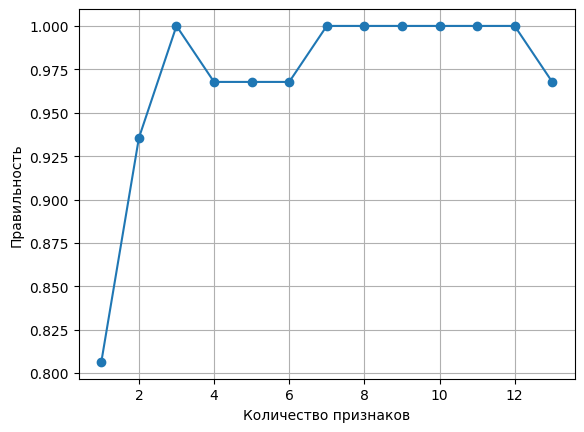

In [69]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker = 'o')
plt.ylabel('Правильность')
plt.xlabel('Количество признаков')
plt.grid()#сетка на заднем фоне

In [70]:
k3 = list(sbs.subsets_[10])#номера трех признаков, которые дают точность 1
print(df_wine.columns[1:][k3])

Index(['Алкоголь', 'Яблочная кислота', '00280/00315 разбавленных вин'], dtype='object')


In [76]:
knn.fit(X_train_std, y_train)
print('Правильность при обучении:',
knn.score(X_train_std, y_train))
print ('Правильность при испытании:',
knn.score(X_test_std, y_test))

Правильность при обучении: 0.967741935483871
Правильность при испытании: 0.9629629629629629


In [77]:
knn.fit(X_train_std[:, k3], y_train)
print('Правильность при обучении:',
knn.score(X_train_std[:, k3], y_train))
print('Правильность при испытании:',
knn.score(X_test_std[:, k3], y_test))

Правильность при обучении: 0.9516129032258065
Правильность при испытании: 0.9259259259259259
